# ST 443 Homework 3

## Question 1

We can find the Bayes discriminant $\eta_l(x) = \pi_l f_l(x)$ using

$\pi_l = 1-l/3$

$f_l(x) = f_{\mathcal{N}(\mu_l, \Sigma_l)}(x)$

$\eta_l(x) = \begin{cases}
    (2/3)(2\pi)^{-1} (\det \Sigma_1)^{-1/2} \exp(-(x-\mu_1)^T \Sigma_1^{-1} (x-\mu_1)/2) & l = 1 \\
    (1/3)(2\pi)^{-1} (\det \Sigma_2)^{-1/2} \exp(-(x-\mu_2)^T \Sigma_2^{-1} (x-\mu_2)/2) & l = 1
\end{cases}$

Removing any constants and substituting $\Sigma = \Sigma_1 = \Sigma_2$

$\eta_l(x) = \begin{cases}
    2\exp(-(x-\mu_1)^T \Sigma^{-1} (x-\mu_1)/2) & l = 1 \\
    \exp(-(x-\mu_2)^T \Sigma^{-1} (x-\mu_2)/2) & l = 1
\end{cases}$

Thus, $\eta_1(x) = \eta_2(x)$ when

$$2\exp(-(x-\mu_1)^T \Sigma^{-1} (x-\mu_1)/2) = \exp(-(x-\mu_2)^T \Sigma^{-1} (x-\mu_2)/2)$$
$$2\exp(-(x_1 - 2)^2/4 - (x_2 - 1)^2/2) = \exp(-(x_1 - 1)^2/4 - (x_2 - 1)^2/2)$$
$$2\exp(-(x_1 - 1)^2/4 - 1/4 + (x_1 - 1)/2) = \exp(-(x_1 - 1)^2/4)$$
$$2\exp(-1/4 + (x_1 - 1)/2) = 1$$
$$x_1 = 3/2 - 2 \log 2$$

The Bayes decisions rule classifies $x_1 > 3/2 - 2 \log 2$ to Class 1 and $x_1 < 3/2 - 2 \log 2$ to Class 2.

## Question 2

### Part a
$$\mathbb{P}[Y_i = l | X_i = x] = \exp(\beta_l^T x)\mathbb{P}[Y_i = L | X_i = x]$$
$$\sum_l \mathbb{P}[Y_i = l | X_i = x] = 1 \Rightarrow \mathbb{P}[Y_i = L | X_i = x] \sum \exp(\beta_l^T x) + \mathbb{P}[Y_i = L | X_i = x] = 1 \Rightarrow \mathbb{P}[Y_i = L | X_i = x] = \left(\sum \exp(\beta_l^T x) + 1\right)^{-1}$$
$$\mathbb{P}[Y_i = l | X_i = x] = \frac{\exp(\beta_l^T x)}{\sum_l \exp(\beta_l^T x) + 1}$$

### Part b
$$\mathcal{L}(\beta; X_i) = \prod \mathbb{P}[l = Y_i | x = X_i]$$
$$-\log \mathcal{L}(\beta; X_i) = -\sum_i \log \frac{\exp(\beta_{Y_i}^T X_i)}{\sum_l \exp(\beta_l^T X_i) + 1}$$
$$L(\beta) = -\log \mathcal{L}(\beta; X_i) = -\sum_i \log \frac{\exp(\beta_{Y_i}^T X_i)}{\exp(\beta_1^T X_i) + \cdots + \exp(\beta_L^T X_i)}$$

### Part c
$$\partial L/\partial \beta_l = -\sum_i \partial/\partial \beta_l(\beta_{Y_i}^T X_i) + \sum_i \partial/\partial \beta_l \log(\exp(\beta_1^T X_i) + \cdots + \exp(\beta_L^T X_i))$$
$$ = -\sum_i 1[Y_i = l]X_i + \sum_i \exp(\beta_l^T X_i) X_i/(\exp(\beta_1^T X_i) + \cdots + \exp(\beta_L^T X_i))$$
$$ = \sum_i (\exp(\beta_l^T X_i)/(\exp(\beta_1^T X_i) + \cdots + \exp(\beta_L^T X_i)) - 1[Y_i=l])X_i$$

### Part d
$$\beta^{(e, i)}_l \leftarrow \beta^{(e, i-1)}_l - \alpha_e \exp(X_i^T \beta^{(e, i)}_l) X_i /\Sigma^{(e, i)}$$
$$\beta^{(e, i)}_{Y_i} \leftarrow \beta^{(e, i-1)}_{Y_i} + \alpha_e X_i$$
where $\Sigma^{(e, i)} = \exp(X_i^T \beta^{(e, i)}_1) + \cdots + \exp(X_i^T \beta^{(e, i)}_L)$.

## Question 3

### Part a

In [18]:
install.packages("ISLR")
library("ISLR")
library(caret)


The downloaded binary packages are in
	/var/folders/vj/5wy9tscn5qb1g47fk_9vwg_40000gn/T//Rtmp0kBmpC/downloaded_packages


In [19]:
cor(Weekly[c(-1, -9)])

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Lag1,1.000000000,-0.07485305,0.05863568,-0.071273876,-0.008183096,-0.06495131,-0.075031842
Lag2,-0.074853051,1.00000000,-0.07572091,0.058381535,-0.072499482,-0.08551314,0.059166717
Lag3,0.058635682,-0.07572091,1.00000000,-0.075395865,0.060657175,-0.06928771,-0.071243639
Lag4,-0.071273876,0.05838153,-0.07539587,1.000000000,-0.075675027,-0.06107462,-0.007825873
Lag5,-0.008183096,-0.07249948,0.06065717,-0.075675027,1.000000000,-0.05851741,0.011012698
Volume,-0.064951313,-0.08551314,-0.06928771,-0.061074617,-0.058517414,1.00000000,-0.033077783
Today,-0.075031842,0.05916672,-0.07124364,-0.007825873,0.011012698,-0.03307778,1.000000000


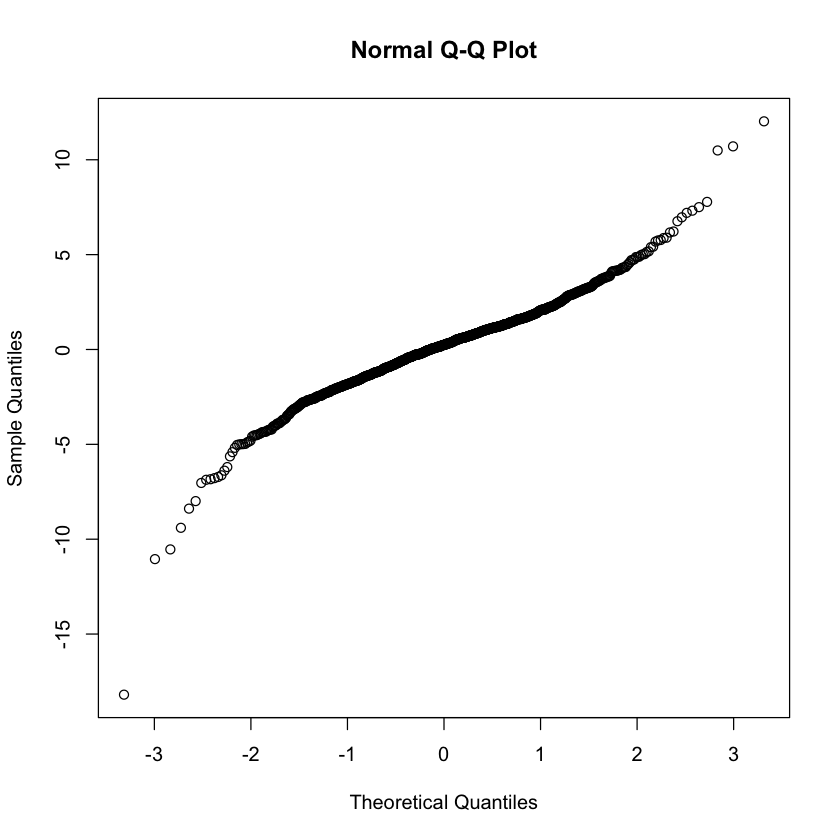

In [20]:
qqnorm(Weekly$Lag1)

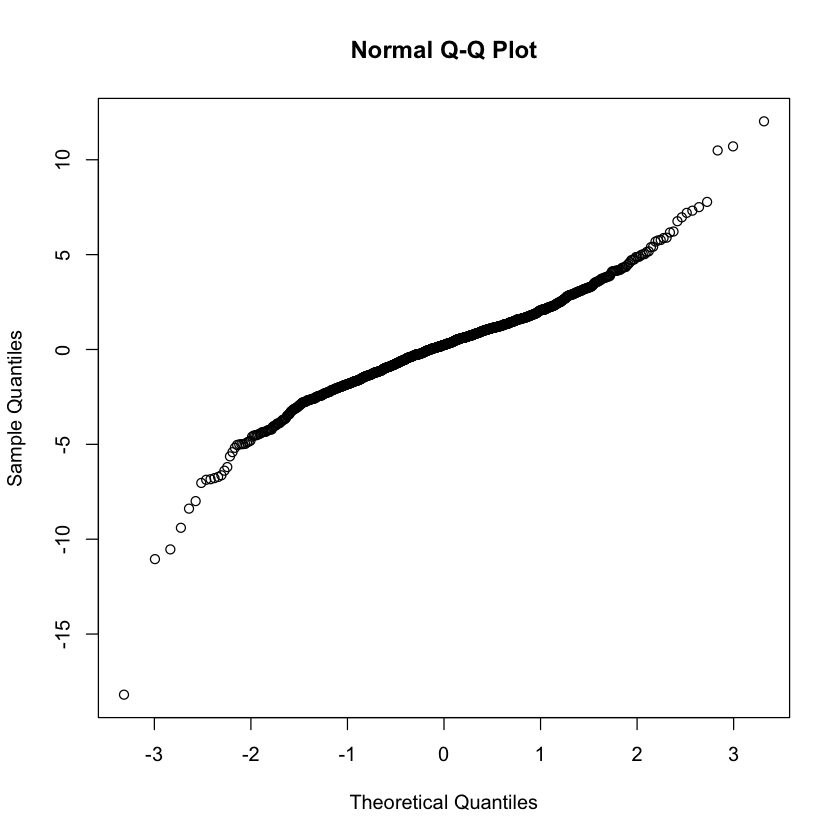

In [21]:
qqnorm(Weekly$Today)

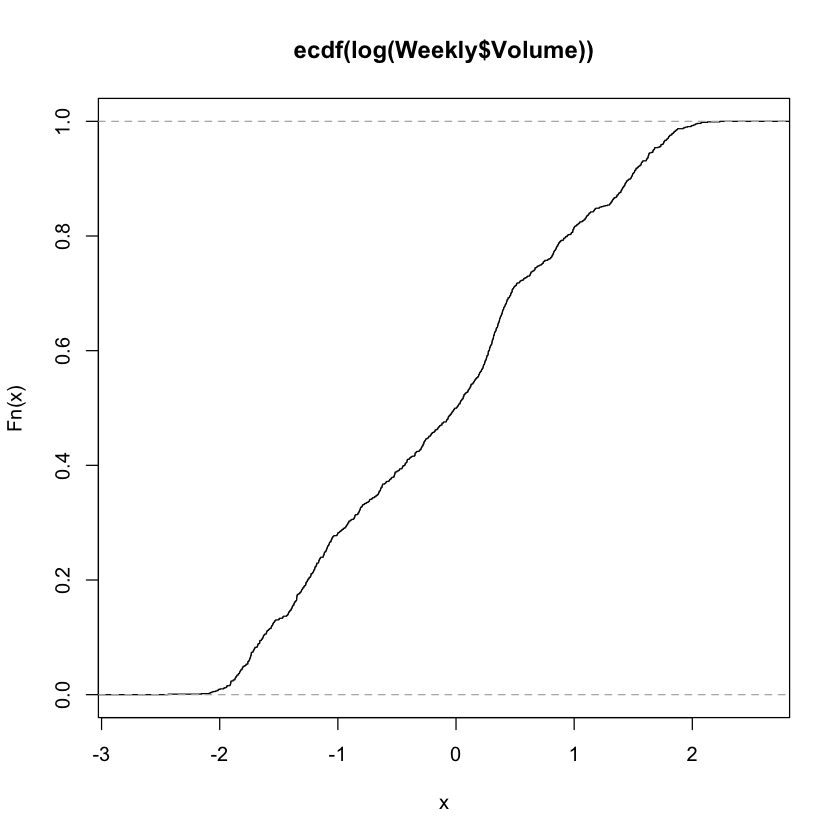

In [22]:
plot(ecdf(log(Weekly$Volume)))

The weekly returns seem to be uncorrelated with one another. They follow a heavy-tailed distribution compared to the normal, and the Volume appears to follow roughly a log-uniform distribution.

### Part b

In [34]:
data <- transform(
    Weekly,
    Direction = ifelse(Weekly$Direction == "Up", 1, 0)
)

ifelse(Weekly$Direction == "Up", 1, 0)

[1] 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0
  [38] 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1
  [75] 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0
 [112] 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1
 [149] 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1
 [186] 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0
 [223] 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1
 [260] 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1
 [297] 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1
 [334] 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0
 [371] 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0
 [408] 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0
 [445] 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0
 [482] 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1
 [519] 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0
 [556] 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0
 [593] 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1
 [630] 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1
 [667] 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0
 [704] 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 [741] 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0
 [778] 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0
 [815] 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0
 [852] 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0
 [889] 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0
 [926] 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0
 [963] 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1
[1000] 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1
[1037] 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1
[1074] 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1

In [36]:
log_reg <- glm(
    Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume,
    family = binomial,
    data = data
)
summary(log_reg)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


None of the predictors look statistically significant.

### Part c

In [44]:
confusionMatrix(
    as.factor(ifelse(data$Direction == 1, "Up", "Down")),
    as.factor(ifelse(predict(log_reg, type = "response") >= 0.5, "Up", "Down"))
)

Confusion Matrix and Statistics

          Reference
Prediction Down  Up
      Down   54 430
      Up     48 557
                                         
               Accuracy : 0.5611         
                 95% CI : (0.531, 0.5908)
    No Information Rate : 0.9063         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.035          
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.52941        
            Specificity : 0.56434        
         Pos Pred Value : 0.11157        
         Neg Pred Value : 0.92066        
             Prevalence : 0.09366        
         Detection Rate : 0.04959        
   Detection Prevalence : 0.44444        
      Balanced Accuracy : 0.54687        
                                         
       'Positive' Class : Down           
                                         

### Part d

In [51]:
train <- data[data$Year <= 2008, ]
test <- data[data$Year >= 2009, ]

log_reg <- glm(Direction ~ Lag2, data = train)

confusionMatrix(
    as.factor(ifelse(test$Direction == 1, "Up", "Down")),
    as.factor(ifelse(
        predict(log_reg, type = "response", newdata = test) >= 0.5,
        "Up", "Down"
    ))
)

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down    9 34
      Up      5 56
                                         
               Accuracy : 0.625          
                 95% CI : (0.5247, 0.718)
    No Information Rate : 0.8654         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.1414         
                                         
 Mcnemar's Test P-Value : 7.34e-06       
                                         
            Sensitivity : 0.64286        
            Specificity : 0.62222        
         Pos Pred Value : 0.20930        
         Neg Pred Value : 0.91803        
             Prevalence : 0.13462        
         Detection Rate : 0.08654        
   Detection Prevalence : 0.41346        
      Balanced Accuracy : 0.63254        
                                         
       'Positive' Class : Down           
                                         

### Part e

In [53]:
library(MASS)
lda_model <- lda(Direction ~ Lag2, data = train)

confusionMatrix(
    as.factor(ifelse(test$Direction == 1, "Up", "Down")),
    as.factor(ifelse(
        predict(lda_model, newdata = test)$class == 1,
        "Up", "Down"
    )),
)

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down    9 34
      Up      5 56
                                         
               Accuracy : 0.625          
                 95% CI : (0.5247, 0.718)
    No Information Rate : 0.8654         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.1414         
                                         
 Mcnemar's Test P-Value : 7.34e-06       
                                         
            Sensitivity : 0.64286        
            Specificity : 0.62222        
         Pos Pred Value : 0.20930        
         Neg Pred Value : 0.91803        
             Prevalence : 0.13462        
         Detection Rate : 0.08654        
   Detection Prevalence : 0.41346        
      Balanced Accuracy : 0.63254        
                                         
       'Positive' Class : Down           
                                         

### Part f

In [28]:
qda_model <-  qda(Direction ~ Lag2, data = train)

confusionMatrix(
    as.factor(predict(qda_model, newdata = test)$class),
    as.factor(test$Direction)
)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0  0  0
         1 43 61
                                          
               Accuracy : 0.5865          
                 95% CI : (0.4858, 0.6823)
    No Information Rate : 0.5865          
    P-Value [Acc > NIR] : 0.5419          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 1.504e-10       
                                          
            Sensitivity : 0.0000          
            Specificity : 1.0000          
         Pos Pred Value :    NaN          
         Neg Pred Value : 0.5865          
             Prevalence : 0.4135          
         Detection Rate : 0.0000          
   Detection Prevalence : 0.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 0               
                                    

### Part g

[1] 13
[1] 0.4134615


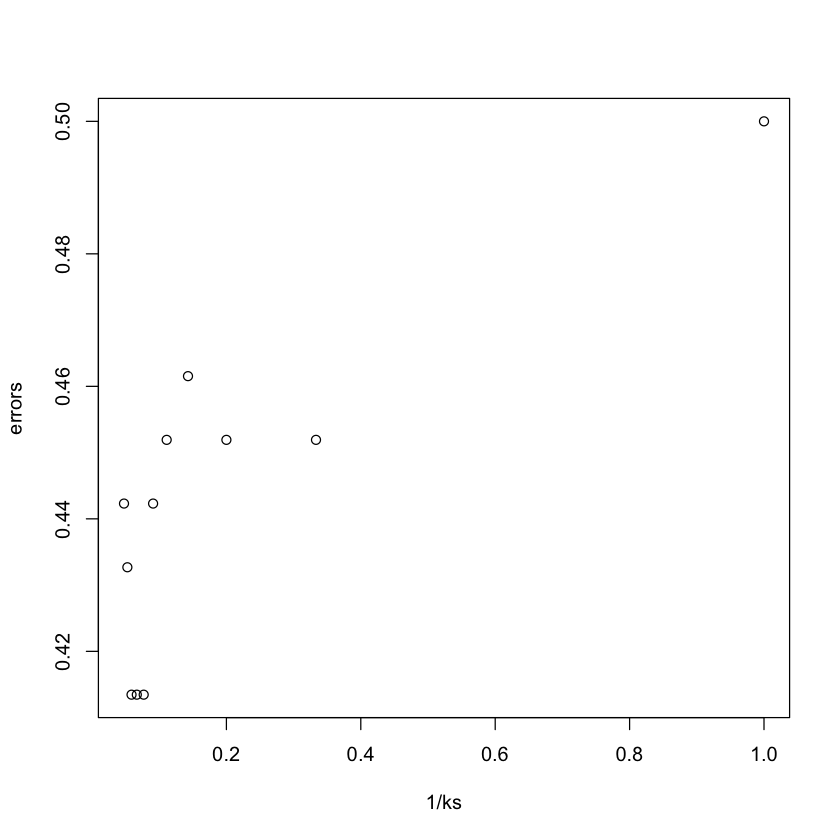

In [70]:
library(class)
ks <- seq(1, 21, 2)
errors <- rep(0, length(ks))

for (i in 1:length(ks)) {
    errors[i] <- mean(
        test$Direction != knn(
            train[c("Lag2")],
            test[c("Lag2")],
            train$Direction,
            k=ks[i]
        )
    )
}

plot(1/ks, errors)
print(ks[which.min(errors)])
print(min(errors))

### Part h

LDA and logistic regression had the best prediction accuracy on the test set.